# Least_Square_Hypo




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Tuesday, April 20, 2021 at 02:14 PM.</small></i>

Import the ROOT libraries

In [1]:
import ROOT as R
from math import pow, sqrt, fabs
R.gROOT.SetStyle("ATLAS")
import array

Welcome to JupyROOT 6.22/07


Input data

In [2]:
y1 = 0.9
e1 = 0.1
y2 = 1.4 
e2 = 0.2

Hypo test: Wald test
================

Define a test stat: y = y1 - y2, y ~ Normal(0, sigma)

In [3]:
y = y2 - y1
e = sqrt(pow(e1, 2) + pow(e2, 2))

H0: y=0, Wald test

In [4]:
w = y/e
p = 2*R.Math.normal_cdf(-fabs(w))

print("test_stat: {0}, p-value: {1}".format(w, p))

test_stat: 2.236067977499789, p-value: 0.025347318677468315


Hypo test: least square
================

MLE y

In [5]:
y = (y1/pow(e1, 2) + y2/pow(e2, 2)) / (1/pow(e1, 2) + 1/pow(e2, 2))
ye = 1/sqrt( 1/pow(e1, 2) + 1/pow(e2, 2) )

chi2 = pow( (y1-y)/e1, 2) + pow( (y2-y)/e2, 2)

P-value

In [6]:
p = R.Math.chisquared_cdf_c(chi2, 1.)
print("MLE y={2}, ye={3}, Chi2= {0}, p-value= {1}".format(chi2, p, y, ye))

MLE y=0.9999999999999999, ye=0.0894427190999916, Chi2= 4.999999999999997, p-value= 0.025347318677468398


Plotting

In [7]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)

myc.cd()

n = 2
ax = array.array("f", [1, 2])
axe = array.array("f", [0]*n)
ay = array.array("f", [y1, y2])
aye = array.array("f", [e1, e2])
gr = R.TGraphErrors(n, ax, ay, axe, aye)

gr_comb = R.TGraphErrors(n)
gr_comb.SetPoint(0, 1, y)
gr_comb.SetPointError(0, 0, ye)
gr_comb.SetPoint(1, 2, y)
gr_comb.SetPointError(1, 0, ye)
gr_comb.SetFillColor(R.kGreen)
gr_comb.SetFillStyle(3002)

gr.Draw("AP")
gr.GetXaxis().SetTitle("Measurements")
gr.GetYaxis().SetTitle("y")

gr_comb.Draw("same C 3")
myc.SaveAs("exer2_hypo.png")

Info in <TCanvas::Print>: png file exer2_hypo.png has been created


Draw all canvases 

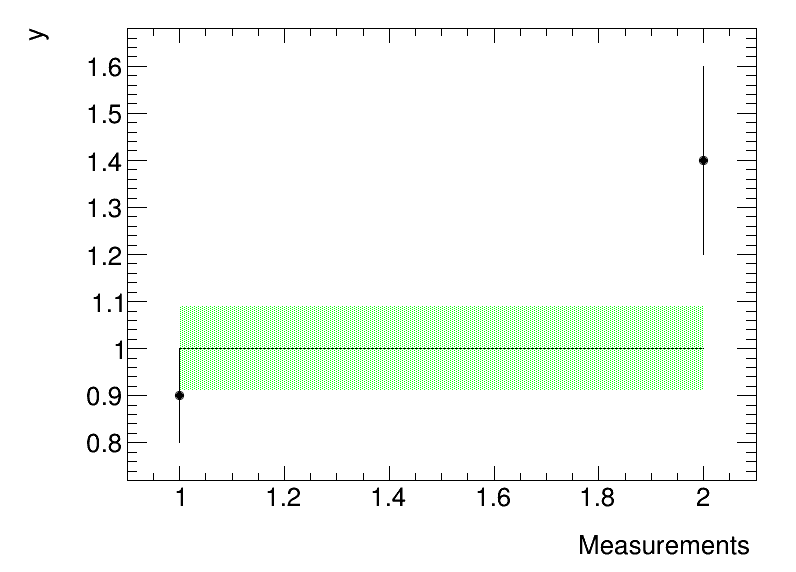

In [8]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()